In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [110]:
sns.set_style('darkgrid')

In [111]:
df = pd.read_csv('POI_with_risk_streets_2.csv')

In [128]:
df.head()

,dba_name,postal_code,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,naics_description,address,Incoming_Visitor_home_census_blocks,POI_risk_final
0,'TIL DEATH TATTOO,92113,6.073003e+10,{},{},TATTOO PARLORS - BOOTH RENTAL,LOGAN AVE,{},0.000000
1,(W)RIGHT ON COMMUNICATIONS INC,92037,6.073008e+10,"{""060730178113"":4,""530610532023"":4,""0605905252...","{""060730085061"":4,""040131048011"":4,""5305307340...",PUBLIC RELATIONS AGENCIES,PROSPECT ST,"{'06073017811': 4, '53061053202': 4, '06059052...",0.111909
2,1 A LIVESCAN SAN DIEGO,92116,6.073002e+10,"{""060730017003"":4,""060730170212"":4}","{""060730170542"":4,""060590525274"":4,""0606504180...","ALL OTH PROF, SCIENTIFIC & TECHNICAL SERVICES",ADAMS AVE,"{'06073001700': 4, '06073017021': 4}",0.286002
3,1 AMERICAN LIVESCAN,92123,6.073009e+10,"{""060730092011"":5,""060730095051"":4,""0607301330...","{""060730034042"":5,""060730031033"":4,""0607300970...",INVESTIGATION SERVICES,MURPHY CANYON RD,"{'06073009201': 5, '06073009505': 4, '06073013...",0.814788
4,113FM RADIO NETWORK,92101,6.073005e+10,"{""060730052002"":4,""060650427281"":4}","{""060730052001"":5,""060730170421"":4,""3200300341...",BROADCASTING & TELECOMMUNICATIONS,15TH ST,"{'06073005200': 4, '06065042728': 4}",0.449672


In [131]:
df['postal_code'].nunique()

80

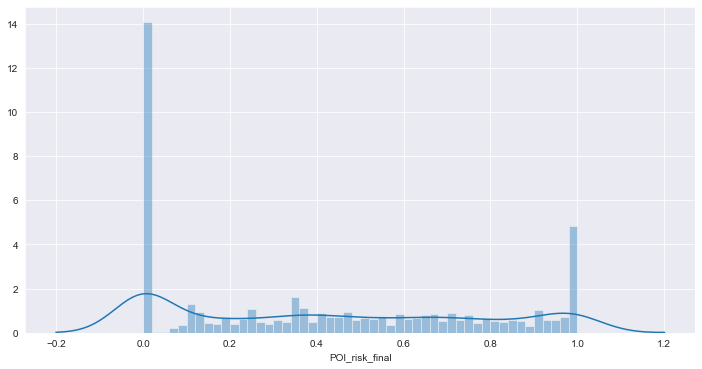

In [112]:
plt.figure(figsize=(12,6))
sns.distplot(df['POI_risk_final'], bins=50)

In [114]:
mean_risk = df.groupby('postal_code')[['POI_risk_final']].mean()

In [115]:
mean_risk['postal_code'] = mean_risk.index

mean_risk.reset_index(drop=True, inplace=True)

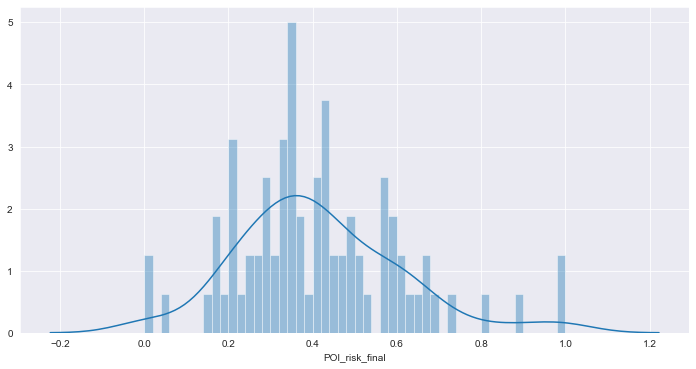

In [116]:
plt.figure(figsize = (12, 6))
sns.distplot(mean_risk['POI_risk_final'], bins=50)

In [118]:
correlation = df.corr()

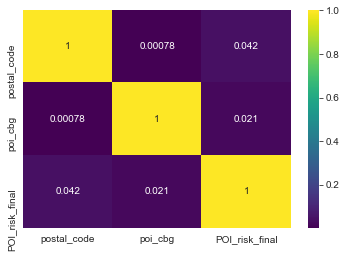

In [119]:
sns.heatmap(correlation, annot=True, cmap= 'viridis')

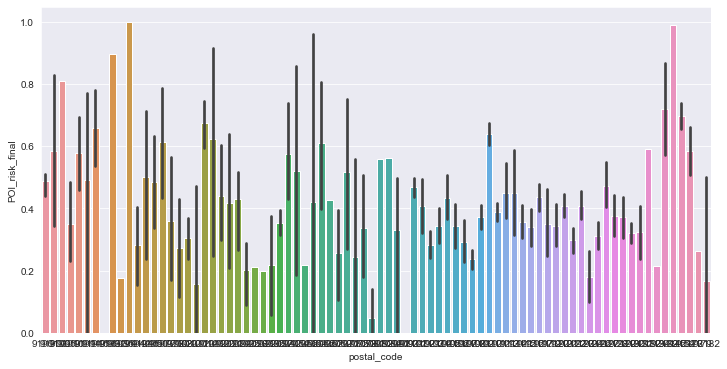

In [133]:
plt.figure(figsize=(12,6))
sns.barplot(x='postal_code', y = 'POI_risk_final', data=df)

In [187]:
def to_string(zip):
    return 'zip: ' + str(zip)
df.sort_values(by='postal_code', inplace=True)
df.reset_index(inplace=True)
df['zip_strings'] = df['postal_code'].apply(lambda x: to_string(x))

In [153]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [193]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df['zip_strings'], y=df['POI_risk_final']))

layout = go.Layout(xaxis=dict(type='category'))

fig.update_layout(
    title="Risk by Postal Code from 91901 to 92179",
    legend_title="Area",
    font=dict(
        color="black"
    )
)

fig.show()